In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import pandas as pd
import numpy as np
import json

mpl.rcParams['figure.dpi'] = 300

### Reading .json

In [2]:
f = open('strings_data_231129.json')  
data = json.load(f)
f.close()

In [6]:
colormap = plt.cm.Accent.colors  # Qualitative colormap
colormap += plt.cm.Dark2.colors
all_users = []

for user_data in data["users"] :
    if user_data["username"] in skip_user :
        continue
    else :
        for img in user_data["images"] :
            if img["viewed"] :
                not_counted = False
                all_users.append(user_data["username"])
                break

user_colors = {}
for i, user in enumerate(all_users) :
    user_colors[user] = colormap[i]

In [7]:
is_irradiated = {
    "Image_1.glb".upper():False,
    "Image_2.glb".upper():False,
    "Image_3.glb".upper():False,
    "Image_4.glb".upper():False,
    "Image_5.glb".upper():False,
    "Image_6.glb".upper():False,
    "Image_7.glb".upper():False,
    "Image_8.glb".upper():False,
    "Image_9.glb".upper():False,
    "Image_25.glb".upper():False,
    "Image_26.glb".upper():False,
    "Image_27.glb".upper():False,
    "Image_28.glb".upper():False,
    "Image_29.glb".upper():False,
    "Image_10.glb".upper():True,
    "Image_11.glb".upper():True,
    "Image_12.glb".upper():True,
    "Image_13.glb".upper():True,
    "Image_14.glb".upper():True,
    "Image_15.glb".upper():True,
    "Image_16.glb".upper():True,
    "Image_17.glb".upper():True,
    "Image_18.glb".upper():True,
    "Image_19.glb".upper():True,
    "Image_20.glb".upper():True,
    "Image_21.glb".upper():True,
    "Image_22.glb".upper():True,
    "Image_23.glb".upper():True,
    "Image_24.glb".upper():True,
}

In [ ]:
images = {name.upper():[] for name in is_irradiated.keys()}
images_counters = {name.upper():[] for name in is_irradiated.keys()}
images_total_count = {}


for user_data in data["users"] :
    if user_data["username"] in skip_user :
        continue
    else :
        name = user_data["username"]
        count = 0
        for img in user_data["images"] :
            if img["viewed"] :
                count += 1
                filename = img["filename"].upper()
                images[filename].append(img["answer"])
                images_counters[filename].append(name)
                if filename not in images_total_count.keys() :
                    images_total_count[filename] = 1
                else :
                    images_total_count[filename] += 1
                
        print(name, count)
        
print("---")
for k, v in images.items() :
    print(k, v)

## Consistency test

Result here is hidden because people names appeared in the initial plot. If asked, I can anonimyze the json and redo it

In [ ]:
test_1_users = []
test_1_count_1 = []
test_1_count_2 = []

test_2_users = []
test_2_count_1 = []
test_2_count_2 = []

colormap_consistency = plt.cm.Dark2.colors

for user_data in data["users"] :
    if user_data["username"] in skip_user :
        continue
    else :
        
        viewed_filenames = [img["filename"].upper() for img in user_data["images"] if img["viewed"]]
        #print(user_data["username"], viewed_filenames)
        
        if "IMAGE_25.GLB" in viewed_filenames and "IMAGE_26.GLB" in viewed_filenames :
            
            test_1_users.append(user_data["username"])
            
            for img in user_data["images"] :
                if img["filename"].upper() == "IMAGE_25.GLB" :
                    test_1_count_1.append(img["answer"])
                elif img["filename"].upper() == "IMAGE_26.GLB" :
                    test_1_count_2.append(img["answer"])
                else :
                    continue
        
        if "IMAGE_2.GLB" in viewed_filenames and "IMAGE_27.GLB" in viewed_filenames :
            
            test_2_users.append(user_data["username"])
            
            for img in user_data["images"] :
                if img["filename"].upper() == "IMAGE_2.GLB" :
                    test_2_count_1.append(img["answer"])
                elif img["filename"].upper() == "IMAGE_27.GLB" :
                    test_2_count_2.append(img["answer"])
                else :
                    continue

print(test_1_users, test_1_count_1, test_1_count_2)
print(test_2_users, test_2_count_1, test_2_count_2)

user_colors = {user : list(colormap_consistency[i]) for i, user in enumerate(set(test_1_users+test_2_users))}
#print(user_colors)

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(6,3))

yticks = np.arange(6,19,2)
xticklabels = ["First count", "Second count"]

ax = axs[0]
ax.boxplot([test_1_count_1, test_1_count_2], positions = [0,1], zorder=5, showfliers=False)
ax.set_ylim(6, 16)
ax.set_yticks(yticks)
ax.set_xticklabels(xticklabels)
ax.set_ylabel("Number of chromosomes counted")

for u, c1, c2 in zip(test_1_users, test_1_count_1, test_1_count_2) :
    offset = np.random.uniform(-0.2,0.2)
    print(u, c1, c2)
    ax.plot([0+offset,1+offset], [c1, c2], color=user_colors[u]+[0.3], mec="k", mfc=user_colors[u]+[0.3], marker="o", lw=1, zorder=2, label=u)
ax.grid(axis="y", zorder=1, lw=0.25)

ax.legend(fontsize=5)
ax.set_title("Consistency test 1")

ax = axs[1]
ax.boxplot([test_2_count_1, test_2_count_2], positions = [0,1], zorder=5, showfliers=False)
ax.set_ylim(6, 16)
ax.set_yticks(yticks)
ax.set_xticklabels(xticklabels)
ax.grid(axis="y", zorder=1, lw=0.25)
for u, c1, c2 in zip(test_2_users, test_2_count_1, test_2_count_2) :
    offset = np.random.uniform(-0.2,0.2)
    ax.plot([0+offset,1+offset], [c1, c2], color=user_colors[u]+[0.3], mec="k", mfc=user_colors[u]+[0.3], marker="o", lw=1, zorder=2, label=u)
    
ax.legend(fontsize=5)
ax.set_title("Consistency test 2")
    
plt.show()

# Images to keep and images to remove

In [11]:
images_to_remove = [
    "IMAGE_7.GLB", # removed file
    "IMAGE_13.GLB", # removed file
    "IMAGE_14.GLB", # removed file
]


# IMAGE 25 = IMAGE 26
# IMAGE 2 = IMAGE 27
ctl = [
    "IMAGE_1.GLB", "IMAGE_2.GLB", "IMAGE_3.GLB", "IMAGE_5.GLB", "IMAGE_6.GLB", "IMAGE_9.GLB", "IMAGE_25.GLB"
]
ird = [
    "IMAGE_10.GLB", "IMAGE_11.GLB", "IMAGE_12.GLB", "IMAGE_15.GLB", "IMAGE_16.GLB", "IMAGE_17.GLB",
    "IMAGE_18.GLB", "IMAGE_19.GLB", "IMAGE_20.GLB", "IMAGE_21.GLB", "IMAGE_22.GLB", "IMAGE_23.GLB",
    "IMAGE_24.GLB",
]

In [12]:
control_data = []
irradiated_data = []

ctl_cnts = {k:[] for k in ctl}
ird_cnts = {k:[] for k in ird}

ctl_cnts_users = {k:[] for k in ctl}
ird_cnts_users = {k:[] for k in ird}

for user_data in data["users"] :
    if user_data["username"] in skip_user :
        continue
    else :
        #print(user_data)
        for img in user_data["images"] :
            if img["filename"].upper() in images_to_remove :
                continue
            else :
                if img["viewed"] == False or img["answer"] is None :
                    continue
                    
                if img["filename"].upper() in ctl :
                    ctl_cnts[img["filename"].upper()].append(img["answer"])
                    ctl_cnts_users[img["filename"].upper()].append(user_data["username"])
                elif img["filename"].upper() in ird :
                    ird_cnts[img["filename"].upper()].append(img["answer"])
                    ird_cnts_users[img["filename"].upper()].append(user_data["username"])
                    
ctl_num_cnts = {k:len(v) for k, v in ctl_cnts.items()}
ird_num_cnts = {k:len(v) for k, v in ird_cnts.items()}

print("Controls:")
for k,v in ctl_num_cnts.items():
    print(k, v)

print("Irradiated:")
for k,v in ird_num_cnts.items():
    print(k, v)

Controls:
IMAGE_1.GLB 8
IMAGE_2.GLB 9
IMAGE_3.GLB 9
IMAGE_5.GLB 6
IMAGE_6.GLB 7
IMAGE_9.GLB 6
IMAGE_25.GLB 11
Irradiated:
IMAGE_10.GLB 4
IMAGE_11.GLB 9
IMAGE_12.GLB 6
IMAGE_15.GLB 5
IMAGE_16.GLB 7
IMAGE_17.GLB 6
IMAGE_18.GLB 5
IMAGE_19.GLB 7
IMAGE_20.GLB 9
IMAGE_21.GLB 5
IMAGE_22.GLB 8
IMAGE_23.GLB 7
IMAGE_24.GLB 6


### Plot counts

{'IMAGE_1.GLB': [10, 10, 10, 10, 11, 9, 11, 10], 'IMAGE_2.GLB': [12, 12, 9, 9, 12, 12, 10, 12, 12], 'IMAGE_3.GLB': [12, 12, 12, 13, 12, 13, 13, 12, 13], 'IMAGE_5.GLB': [11, 9, 11, 11, 10, 12], 'IMAGE_6.GLB': [12, 5, 6, 11, 11, 8, 12], 'IMAGE_9.GLB': [12, 1, 12, 10, 10, 12], 'IMAGE_25.GLB': [11, 11, 12, 9, 11, 11, 12, 12, 11, 11, 12]}
====


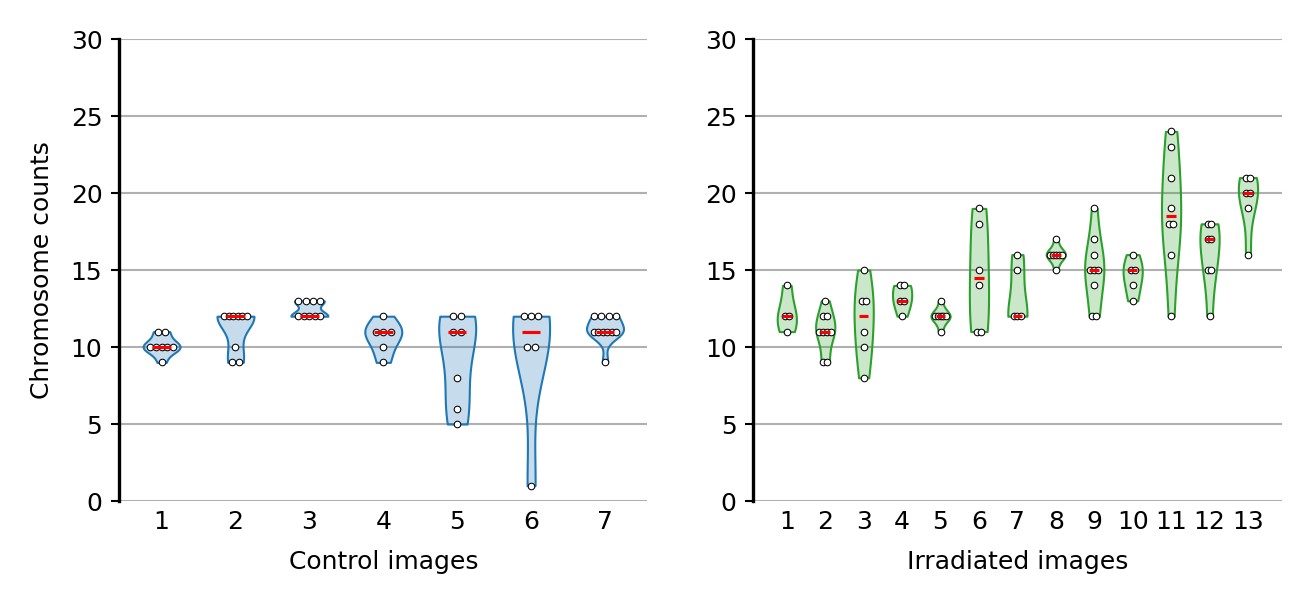

In [13]:
ccycle = plt.rcParams['axes.prop_cycle'].by_key()['color']

ird_col = ccycle[2]
ctl_col = ccycle[0]

from collections import Counter
def swarm_x_jitter(x, y, step=0.05, width=1.0):
    """Generate jittered x-values centered on x for repeated y-values."""
    counts = Counter(y)
    x_jittered, y_ordered = [], []
    max_offset = width / 2

    for val in sorted(counts):
        n = counts[val]

        if n == 1:
            offsets = [0]
        else:
            # Generate centered offsets, growing outwards
            indices = np.arange(n) - (n - 1) / 2  # symmetrical: e.g., [-1, 0, 1] for n=3
            offsets = indices * step

            # Rescale if total span would exceed allowed range
            if np.max(np.abs(offsets)) > max_offset:
                scale = max_offset / np.max(np.abs(offsets))
                offsets = offsets * scale

        x_jittered.extend(x + offsets)
        y_ordered.extend([val] * n)

    return x_jittered, y_ordered

def format_vps(vps, color) :
    
    for i, b in enumerate(vps["bodies"]) :
        b.set_alpha(None)
        b.set_edgecolor(color)
        b.set_zorder(5)
        b.set_facecolor(color+'40')
        b.set_linewidth(0.5)
    
    
    vps["cmedians"].set_color("red")
    vps["cmedians"].set_linewidth(0.75)
    vps["cmedians"].set_alpha(None)
    vps["cmedians"].set_zorder(15)

#remove_images = 

print(ctl_cnts)
print('====')
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(5,2), dpi=300)

ax = axs[0]
xticks = np.arange(len(ctl_cnts.values()))
ax.set_xticks(xticks)
bps = ax.violinplot(ctl_cnts.values(), positions=xticks, showmedians=True, showextrema=False) #, patch_artist=True, zorder=5)
format_vps(bps, ctl_col)

for x in xticks:
    yv = list(ctl_cnts.values())[x]
    jitter_strength = 0.1  # Adjust as needed
    xv, yv_spread = swarm_x_jitter(x, yv, step=0.1, width=0.3)
    #print(xv, yv_spread)
    ax.scatter(x=xv, y=yv_spread, marker='.', zorder=5, s=10, lw=0.25, color='w', ec='k')

ax.set_xticklabels([f"{x+1}" for x in xticks])
#xticklabels = ["0", "1", "1\nbis", "2", "3", "4", "4\nbis"]
#ax.set_xticklabels(xticklabels)

ax = axs[1]
xticks = np.arange(len(ird_cnts.values()))
ax.set_xticks(xticks)
bps = ax.violinplot(ird_cnts.values(), positions=xticks, showmedians=True, showextrema=False)
format_vps(bps, ird_col)

for x in xticks:
    yv = list(ird_cnts.values())[x]
    jitter_strength = 0.1  # Adjust as needed
    xv, yv_spread = swarm_x_jitter(x, yv, step=0.1, width=0.3)
    #print(xv, yv_spread)
    ax.scatter(x=xv, y=yv_spread, marker='.', zorder=5, s=10, lw=0.25, color='w', ec='k')

ax.set_xticklabels([f"{x+1}" for x in xticks])

axs[0].set_ylabel("Chromosome counts", fontsize=6)
axs[0].set_xlabel("Control images", fontsize=6)
axs[1].set_xlabel("Irradiated images", fontsize=6)

for ax in axs.flatten() :
    ax.tick_params(axis='x', labelsize=6, width=0, length=0, pad=2)
    ax.tick_params(axis='y', labelsize=6, width=0.5, length=2, pad=2)
    ax.grid(axis='y', zorder=1, lw=0.5)
    ax.set_ylim(0,30)
    ax.spines[['right', 'top', 'bottom']].set_visible(False)

fig.subplots_adjust(wspace=0.2, hspace=0.02)

plt.show()

### Some stats

In [14]:
dc = {
    'treatment':[],
    'sample':[],
    'count':[]
}

for image, counts in ctl_cnts.items():
    for reported_number in counts:
        dc['treatment'].append('Control')
        dc['sample'].append(image)
        dc['count'].append(reported_number)

for image, counts in ird_cnts.items():
    for reported_number in counts:
        dc['treatment'].append('Irradiated')
        dc['sample'].append(image)
        dc['count'].append(reported_number)

df = pd.DataFrame(dc)
df

,treatment,sample,count
0,Control,IMAGE_1.GLB,10
1,Control,IMAGE_1.GLB,10
2,Control,IMAGE_1.GLB,10
3,Control,IMAGE_1.GLB,10
4,Control,IMAGE_1.GLB,11
...,...,...,...
135,Irradiated,IMAGE_24.GLB,19
136,Irradiated,IMAGE_24.GLB,20
137,Irradiated,IMAGE_24.GLB,21
138,Irradiated,IMAGE_24.GLB,20


In [15]:
print(df.to_csv(index=False))

treatment,sample,count
Control,IMAGE_1.GLB,10
Control,IMAGE_1.GLB,10
Control,IMAGE_1.GLB,10
Control,IMAGE_1.GLB,10
Control,IMAGE_1.GLB,11
Control,IMAGE_1.GLB,9
Control,IMAGE_1.GLB,11
Control,IMAGE_1.GLB,10
Control,IMAGE_2.GLB,12
Control,IMAGE_2.GLB,12
Control,IMAGE_2.GLB,9
Control,IMAGE_2.GLB,9
Control,IMAGE_2.GLB,12
Control,IMAGE_2.GLB,12
Control,IMAGE_2.GLB,10
Control,IMAGE_2.GLB,12
Control,IMAGE_2.GLB,12
Control,IMAGE_3.GLB,12
Control,IMAGE_3.GLB,12
Control,IMAGE_3.GLB,12
Control,IMAGE_3.GLB,13
Control,IMAGE_3.GLB,12
Control,IMAGE_3.GLB,13
Control,IMAGE_3.GLB,13
Control,IMAGE_3.GLB,12
Control,IMAGE_3.GLB,13
Control,IMAGE_5.GLB,11
Control,IMAGE_5.GLB,9
Control,IMAGE_5.GLB,11
Control,IMAGE_5.GLB,11
Control,IMAGE_5.GLB,10
Control,IMAGE_5.GLB,12
Control,IMAGE_6.GLB,12
Control,IMAGE_6.GLB,5
Control,IMAGE_6.GLB,6
Control,IMAGE_6.GLB,11
Control,IMAGE_6.GLB,11
Control,IMAGE_6.GLB,8
Control,IMAGE_6.GLB,12
Control,IMAGE_9.GLB,12
Control,IMAGE_9.GLB,1
Control,IMAGE_9.GLB,12
Control,IMAGE_9.GLB

In [16]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [19]:
# Mixed lm gaussian — sample as random effect
model = smf.ols("count ~ treatment", data=df)
result = model.fit()
print(result.summary())
print(result.pvalues)

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.301
Model:                            OLS   Adj. R-squared:                  0.296
Method:                 Least Squares   F-statistic:                     59.49
Date:                Thu, 11 Sep 2025   Prob (F-statistic):           2.21e-12
Time:                        20:31:29   Log-Likelihood:                -344.91
No. Observations:                 140   AIC:                             693.8
Df Residuals:                     138   BIC:                             699.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                 

In [86]:
# Mixed lm gaussian — sample as random effect
model = smf.mixedlm("count ~ treatment", data=df, groups=df["sample"])
result = model.fit()
print(result.summary())

              Mixed Linear Model Regression Results
Model:                 MixedLM    Dependent Variable:    count    
No. Observations:      140        Method:                REML     
No. Groups:            20         Scale:                 4.1723   
Min. group size:       4          Log-Likelihood:        -317.5168
Max. group size:       11         Converged:             Yes      
Mean group size:       7.0                                        
------------------------------------------------------------------
                        Coef.  Std.Err.   z    P>|z| [0.025 0.975]
------------------------------------------------------------------
Intercept               10.631    0.842 12.621 0.000  8.980 12.282
treatment[T.Irradiated]  3.860    1.050  3.678 0.000  1.803  5.918
Group Var                4.424    0.882                           



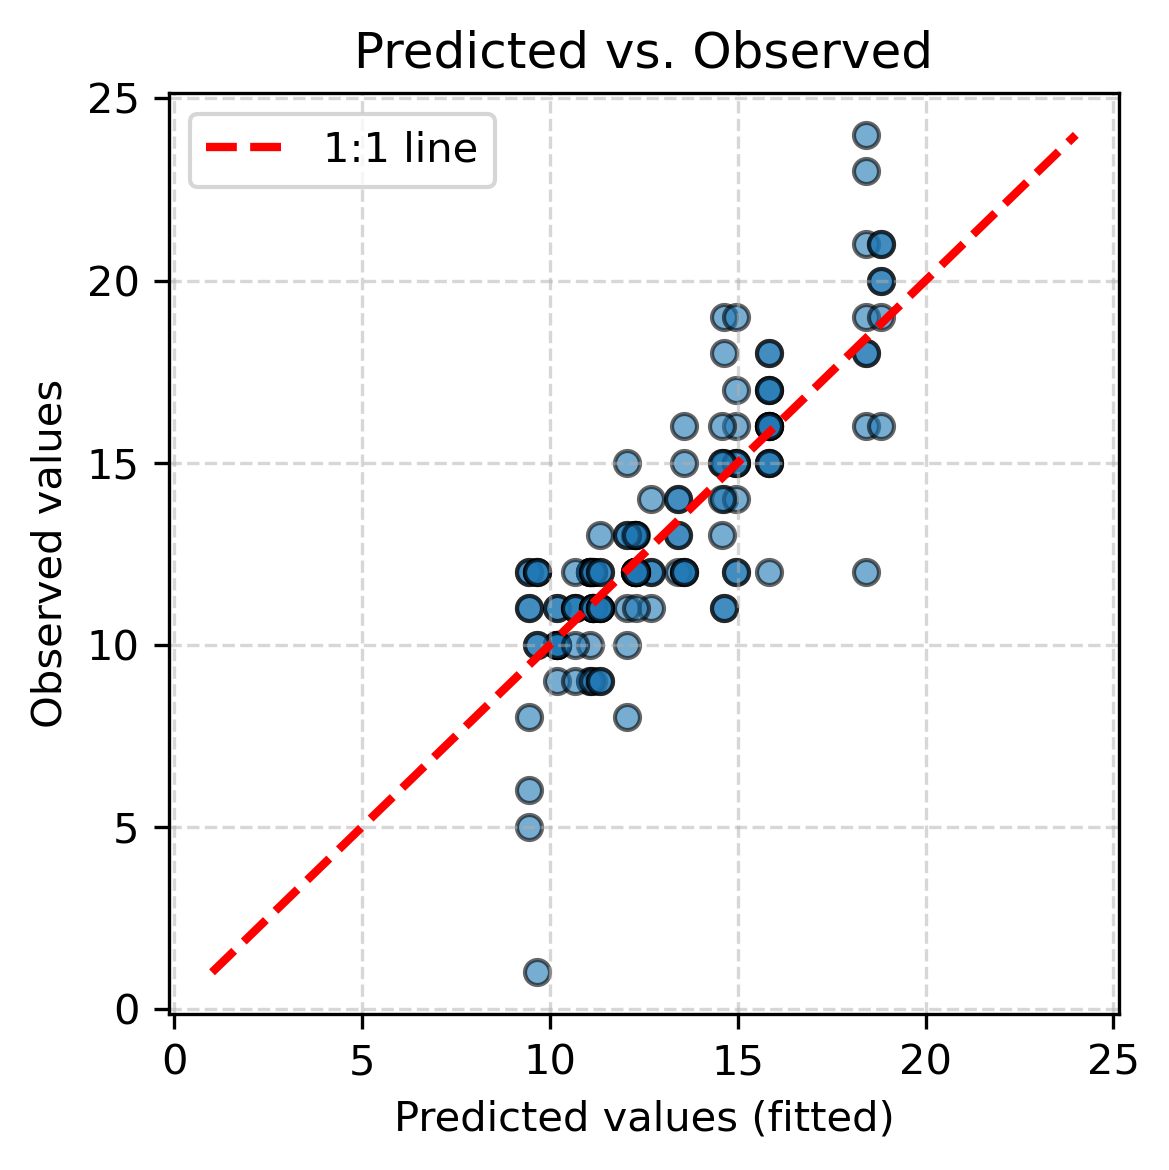

In [87]:
# Get predicted values (fitted values)
fitted = result.fittedvalues

# Get observed values
observed = df["count"]

plt.figure(figsize=(4, 4))
plt.scatter(fitted, observed, alpha=0.6, edgecolor='k')
plt.plot([observed.min(), observed.max()],
         [observed.min(), observed.max()],
         'r--', lw=2, label="1:1 line")
plt.xlabel("Predicted values (fitted)")
plt.ylabel("Observed values")
plt.title("Predicted vs. Observed")
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend()
plt.tight_layout()
plt.show()

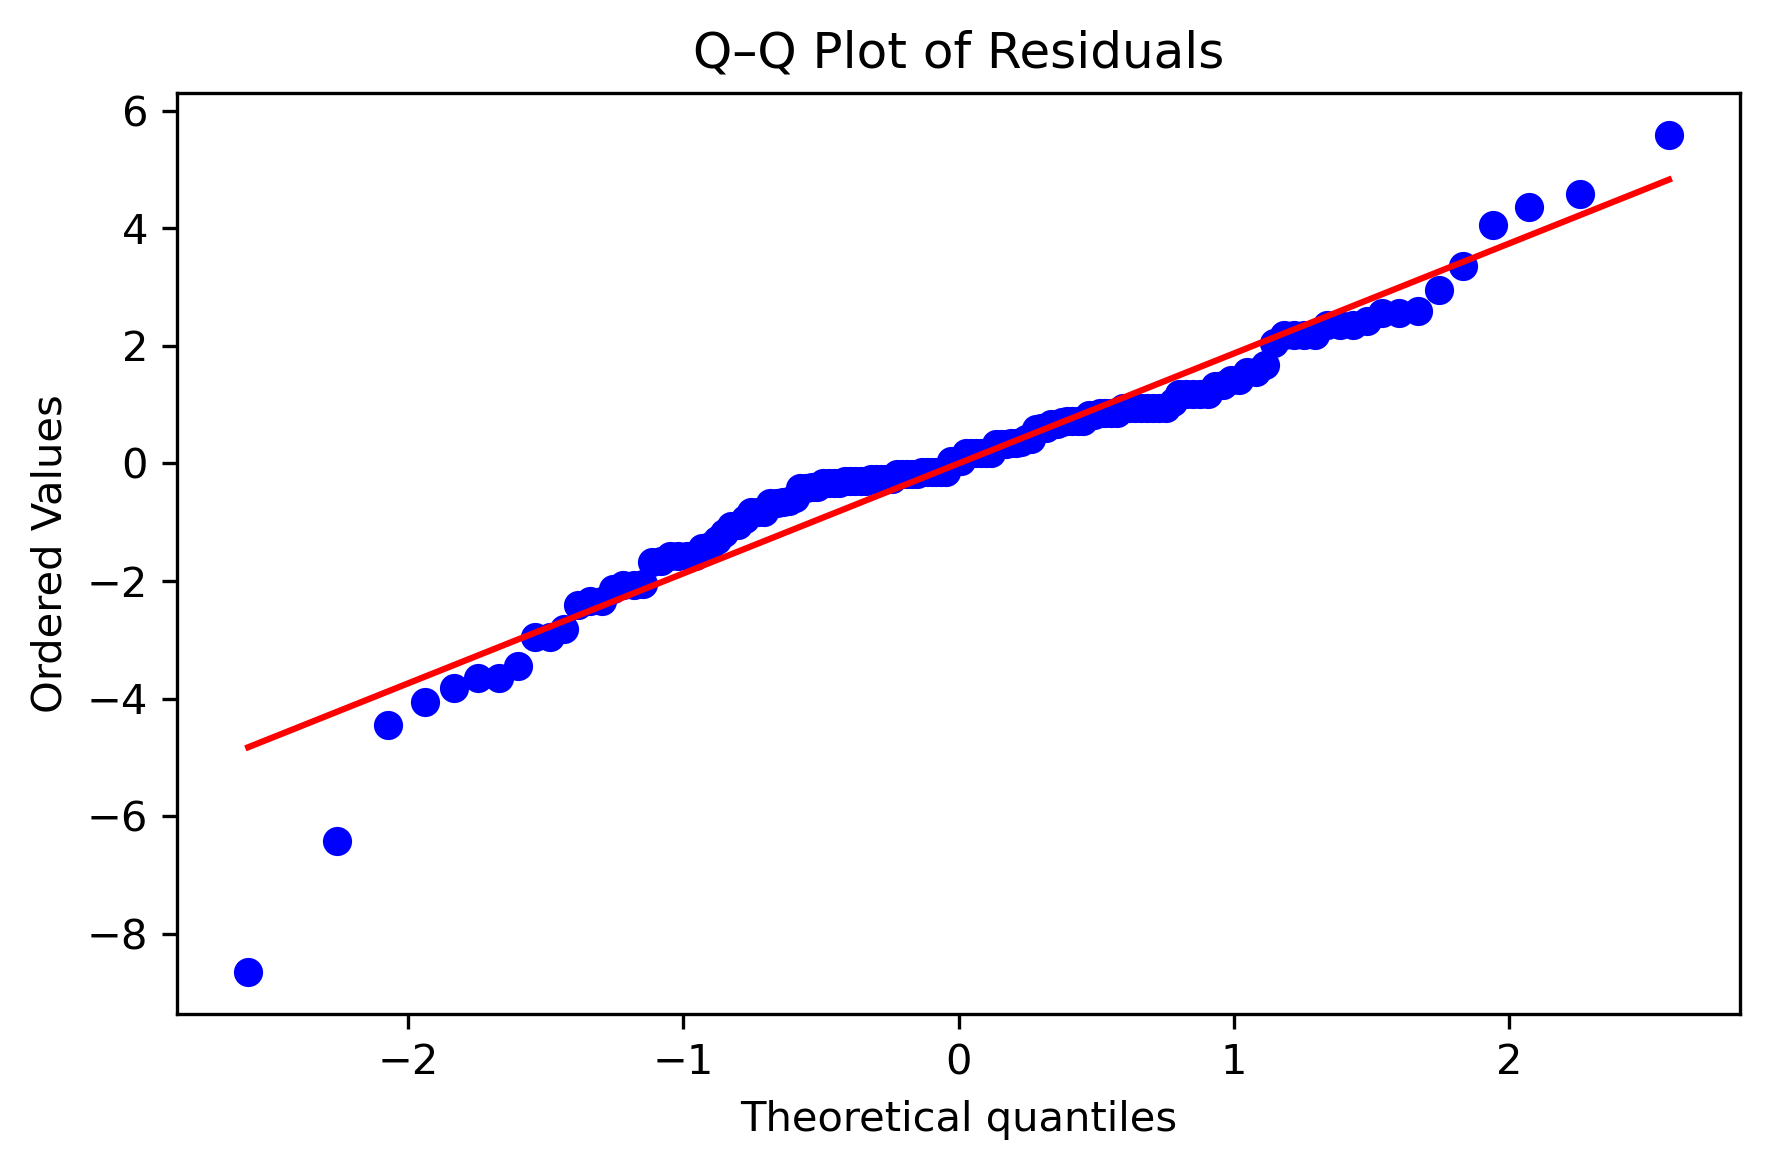

In [88]:
import scipy.stats as stats

resid = result.resid

fig = plt.figure(figsize=(6, 4))
ax = fig.add_subplot(111)

# Q-Q plot
stats.probplot(resid, dist="norm", plot=ax)
ax.get_lines()[1].set_color('red')  # Optional: make the fit line red
ax.set_title("Q–Q Plot of Residuals")
plt.tight_layout()
plt.show()
